In [5]:
#pip install anthropic
#!pip install datasets
#!pip install anthropic

In [6]:
from anthropic import Anthropic, HUMAN_PROMPT, AI_PROMPT
from datasets import load_dataset as ld
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import pandas as pd

In [7]:

def load_dataset_as_pandas_dataframe(
    dataset_name: str="trec"
):

    dataset = ld(dataset_name)
    df = dataset["train"].to_pandas()
    df = df.sample(frac=1)

    df_test = dataset["test"].to_pandas()
    df_test = df_test.sample(frac=1)

    return df, df_test

In [8]:
df, df_test = load_dataset_as_pandas_dataframe()

Generating train split:   0%|          | 0/5452 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/500 [00:00<?, ? examples/s]

In [9]:
df_test.head()

,text,coarse_label,fine_label
64,What state did the Battle of Bighorn take plac...,4,36
224,Which mountain range in North America stretche...,4,34
95,Where is Prince Edward Island ?,4,35
163,Where is the volcano Mauna Loa ?,4,35
442,Which country has the most water pollution ?,4,33


In [10]:
id_to_label = {0 : 'ABBR' , 1 : 'ENTY', 2: 'DESC', 3 : 'HUM', 4 : 'LOC', 5 : 'NUM'}
label_to_id= { 'ABBR' : 0 , 'ENTY' : 1, 'DESC': 2, 'HUM' :3, 'LOC' : 4, 'NUM' : 5}
categories = list(label_to_id.keys())

In [11]:
categories

['ABBR', 'ENTY', 'DESC', 'HUM', 'LOC', 'NUM']

In [12]:
df_test['coarse_label'] = df_test['coarse_label'].map(id_to_label)

In [13]:
anthropic = Anthropic(
    # defaults to os.environ.get("ANTHROPIC_API_KEY")
    api_key="your_api_key_here,
)

In [14]:
output = []
iteration = 0
for row in df_test['text']:
    iteration += 1
    ai_instruction = (
    f"I will provide you with a text {row}. "
    f"Please reply with the closest category only, choosing from one of the categories: {categories} "
    f"in a format just the category itself with a single string and no spaces."


)
    completion_ai = anthropic.completions.create(
        model="claude-2",
        max_tokens_to_sample=3000,
        prompt=f"{HUMAN_PROMPT}{ai_instruction}{AI_PROMPT}",
    )
    print('iteration {} '.format(iteration))
    print(completion_ai.completion)
    output.append(completion_ai.completion)

iteration 1 
 LOC
iteration 2 
 LOC
iteration 3 
 LOC
iteration 4 
 LOC
iteration 5 
 LOC
iteration 6 
 DESC
iteration 7 
 DESC
iteration 8 
 DESC
iteration 9 
 ENTY
iteration 10 
 DESC
iteration 11 
 DESC
iteration 12 
 DESC
iteration 13 
 LOC
iteration 14 
 NUM
iteration 15 
 DESC
iteration 17 
 LOC
iteration 18 
 NUM
iteration 19 
 ABBR
iteration 20 
 NUM
iteration 21 
 DESC
iteration 22 
 DESC
iteration 23 
 DESC
iteration 24 
 LOC
iteration 25 
 DESC
iteration 26 
 NUM
iteration 27 
 NUM
iteration 28 
 HUM
iteration 29 
 DESC
iteration 30 
 ENTY
iteration 31 
 DESC
iteration 32 
 LOC
iteration 33 
 DESC
iteration 34 
 DESC
iteration 35 
 NUM
iteration 36 
 DESC
iteration 37 
 DESC
iteration 38 
 DESC
iteration 39 
 NUM
iteration 40 
 DESC
iteration 41 
 NUM
iteration 42 
 DESC
iteration 43 
 LOC
iteration 44 
 DESC
iteration 45 
 DESC
iteration 46 
 NUM
iteration 47 
 DESC
iteration 48 
 HUM
iteration 49 
 DESC
iteration 50 
 NUM
iteration 51 
 DESC
iteration 52 
 NUM
iteration 53

In [22]:
output = [s.strip() for s in output]

In [23]:
acc_score = accuracy_score(df_test["coarse_label"],output)

In [24]:
acc_score

0.664

In [46]:
incorrect_df = pd.DataFrame({'text' : df_test['text'] ,'coarse_label' : df_test["coarse_label"], 'output':  output})

In [47]:
incorrect_df

,text,coarse_label,output
64,What state did the Battle of Bighorn take plac...,LOC,LOC
224,Which mountain range in North America stretche...,LOC,LOC
95,Where is Prince Edward Island ?,LOC,LOC
163,Where is the volcano Mauna Loa ?,LOC,LOC
442,Which country has the most water pollution ?,LOC,LOC
...,...,...,...
131,Who was the abolitionist who led the raid on H...,HUM,HUM
392,What is a baby lion called ?,ENTY,CUB
380,Who killed John F. Kennedy ?,HUM,DESC
13,Who was the first man to fly across the Pacifi...,HUM,DESC


In [48]:
examples_df = incorrect_df[incorrect_df['coarse_label'] != incorrect_df['output']]

In [49]:
examples_df.head(5)

,text,coarse_label,output
239,How fast is sound ?,NUM,DESC
452,What is the active ingredient in baking soda ?,ENTY,DESC
52,Which comedian 's signature line is `` Can we ...,HUM,ENTY
418,Who is the congressman from state of Texas on ...,HUM,LOC
55,What does cc in engines mean ?,DESC,ABBR


In [50]:
examples = {}

In [61]:
examples

{'How fast is sound ?': 'NUM',
 'What is the active ingredient in baking soda ?': 'ENTY',
 "Which comedian 's signature line is `` Can we talk '' ?": 'HUM',
 'Who is the congressman from state of Texas on the armed forces committee ?': 'HUM',
 'What does cc in engines mean ?': 'DESC',
 'What is the sales tax in Minnesota ?': 'ENTY',
 'Who was Galileo ?': 'HUM',
 "What person 's head is on a dime ?": 'HUM',
 'Who was the 22nd President of the US ?': 'HUM',
 'What planet has the strongest magnetic field of all the planets ?': 'LOC',
 'Who is the tallest man in the world ?': 'HUM',
 'What is foot and mouth disease ?': 'ENTY',
 "What is the name of Neil Armstrong 's wife ?": 'HUM',
 'What baseball team was the first to make numbers part of their uniform ?': 'HUM',
 'What is the brightest star ?': 'LOC',
 'What is the fourth highest mountain in the world ?': 'LOC',
 'What is the proper name for a female walrus ?': 'ENTY',
 'What fruit is Melba sauce made from ?': 'ENTY',
 'Who was the 23rd 

In [51]:
for index, row in examples_df[:50].iterrows():
  examples[row['text']] = row['coarse_label']

In [70]:
iteration = 0

In [71]:
for row in df_test['text']:
    iteration += 1
    ai_instruction = (
        f"I will provide you with a text {row}. "
        f"Please reply with the closest category only, choosing from one of the categories: {categories} "
        f"in a format just the category itself with a single string and no spaces.",
        f"Review the instances occurred with these examples where the error you made and now I fix it {examples} and return category itself with a single string and no spaces")


    completion_ai = anthropic.completions.create(
        model="claude-2",
        max_tokens_to_sample=3000,
        prompt=f"{HUMAN_PROMPT}{ai_instruction}{AI_PROMPT}",
    )
    print('iteration {} '.format(iteration))
    print(completion_ai.completion)
    output.append(completion_ai.completion)





iteration 1 
 LOC
iteration 2 
 LOC
iteration 3 
 LOC
iteration 4 
 LOC
iteration 5 
 LOC
iteration 6 
 DESC
iteration 7 
 NUM
iteration 8 
 ENCY
iteration 9 
 HUM
iteration 10 
 DESC
iteration 11 
 DESC
iteration 12 
 ENTY
iteration 13 
 HUM
iteration 14 
 NUM
iteration 15 
 DESC
iteration 16 
 DESCR
iteration 17 
 LOC
iteration 18 
 What year was the Mona Lisa painted ?
iteration 19 
 DESC
iteration 20 
 DESC
iteration 21 
 HUM
iteration 22 
 HUM
iteration 23 
 DESC
iteration 24 
 LOC
iteration 25 
 DESC
iteration 26 
 HUM
iteration 27 
 LOC
iteration 28 
 HUM
iteration 29 
 HUM
iteration 30 
 ENTY
iteration 31 
 DESC
iteration 32 
 LOC
iteration 33 
 DESC
iteration 34 
 DESC
iteration 35 
 NUM
iteration 36 
 DESC
iteration 37 
 "DESC"
iteration 38 
 DESC
iteration 39 
 NUM
iteration 40 
 HUM
iteration 41 
 HUM
iteration 42 
 DESC
iteration 43 
 Where did Howard Hughes die?

Since this asks for a location of a person's death, the closest category is 'LOC'.

Therefore, my response is:

In [84]:
output = output[544:1044]

In [85]:
output = [s.strip() for s in output]

In [86]:
acc_score = accuracy_score(df_test["coarse_label"],output)

In [90]:
import pandas as pd

# Assuming df_test is your DataFrame and output is your list of predictions
df_result = pd.DataFrame({"coarse_label": df_test["coarse_label"], "predicted_label": output})

# Specify the file path where you want to save the Excel file
excel_file_path = "result_output.csv"

# Save the result DataFrame to Excel
df_result.to_csv(excel_file_path, index=False)

# Print a message to confirm the saving
print(f"Results saved to {excel_file_path}")

Results saved to result_output.csv


In [87]:
acc_score

0.708

In [94]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


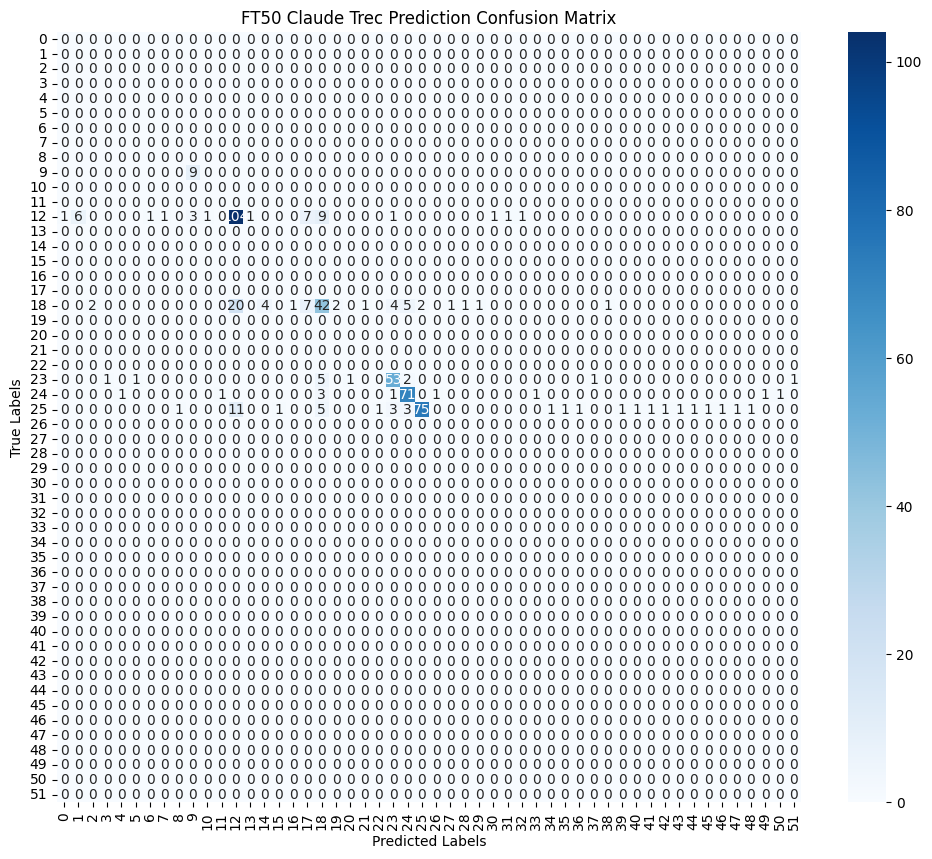

In [96]:
# Compute the confusion matrix
cm = confusion_matrix(df_test["coarse_label"], output)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('FT50 Claude Trec Prediction Confusion Matrix')

# Save the confusion matrix as an image
plt.savefig('FT50 Claude Trec Prediction Confusion Matrix.png')
plt.show()